In [1]:
import torch
# initiating the generator for generating radom integers
generator = torch.Generator(device=device)
seed = 20040324
generator.manual_seed(seed)

words = open('/Users/ezelbayraktar/Documents/DL-NLP/MyLanguageModelJourney/names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
#getting chars 
chars = sorted(list(set(''.join(words))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [3]:
## implementing a dictionary to enum chars
ctoi={}
ctoi['.'] = 0
i = 1
for char in chars:
    # i do not check if char is in ctoi since chars is already a set so no dupes
    # so it is not possible that char is added to ctos twice
    ctoi[char] = i
    i+=1
ctoi['.']

0

In [4]:
## implementing a dictionary to char nums

## just flipping ctoi since itoc is just the same but with keys and values exchanged
itoc = {value: key for key, value in ctoi.items()}
itoc[0]

'.'

In [5]:
## building ...
import torch
gram = 3
X,Y = [],[]
for w in words:
    #print(w)
    grams = [0]*gram
    for ch in w+'.':
        cai = ctoi[ch] ## cai stands for character as integer
        X.append(grams)
        Y.append(cai)
        #print(itoc[grams[0]],itoc[grams[1]],itoc[grams[2]]," >> ",itoc[cai])
        ##print(ch,cai)
        grams = grams[1:] + [cai]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [34]:
data_size = X.shape[0]
data_random_indices = torch.randperm(data_size)
data_random_indices

tensor([214368,  66134,  94484,  ...,  85392,  95951,  81987])

In [39]:
train_size = 0.8
#train_indices_of_rows = torch.randint(0, data_size ,data_size * train_size, generator=generator)
train_indices_of_rows = data_random_indices[:int(train_size*data_size)]
X_train = X[train_indices_of_rows]
Y_train = Y[train_indices_of_rows]

In [41]:
validation_size = 0.1
#validation_indices_of_rows = torch.randint(0, data_size ,data_size * validation_size, generator=generator)
validation_indices_of_rows = data_random_indices[int(train_size*data_size):int((validation_size+train_size)*data_size)]
X_valid = X[validation_indices_of_rows]
Y_valid = Y[validation_indices_of_rows]

In [43]:
evaluation_size = 0.1
#evalutation_indices_of_rows = torch.randint(0, data_size ,data_size * evaluation_size, generator=generator)
evalutation_indices_of_rows = data_random_indices[int((validation_size+train_size)*data_size):]
X_eval = X[evalutation_indices_of_rows]
Y_eval = Y[evalutation_indices_of_rows]

In [48]:

# Print shapes
print("Shapes:")
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"Y_valid: {Y_valid.shape}")
print(f"X_eval: {X_eval.shape}")
print(f"Y_eval: {Y_eval.shape}")



Shapes:
X_train: torch.Size([182516, 3])
Y_train: torch.Size([182516])
X_valid: torch.Size([22815, 3])
Y_valid: torch.Size([22815])
X_eval: torch.Size([22815, 3])
Y_eval: torch.Size([22815])


In [9]:
# choosing gpu as computational device if gpu is available
# since we are working with small data this step is not necessary indeed
# but i own the repo and do whatever i want... just joking doing it for fun im really stressed out


# MPS: Metal Performance Shaders --> for Mac devices with M chips
# CUDA: For device with cuda support
# CPU: General case
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

#X_train = X_train.to(device)
#Y_train = Y_train.to(device)
#X_valid = X_valid.to(device)
#Y_valid = Y_valid.to(device)
#X_eval = X_eval.to(device)
#Y_eval = Y_eval.to(device)


rows = 27 #  english chars + the dot
dimension = 2 # dimensions for each char
params = torch.randn(rows, dimension, generator=generator, device=device)
params
# params are the dimension values our model assigns to characters

tensor([[-0.8441,  0.4442],
        [ 0.7368,  0.7954],
        [-0.5493,  0.2943],
        [-0.1826, -1.3402],
        [ 1.2121,  0.3059],
        [ 0.3878, -1.1010],
        [ 1.8189,  0.4719],
        [-0.2023, -1.8422],
        [ 0.5779,  1.0814],
        [ 1.2433,  0.4114],
        [-0.7053, -0.3688],
        [-0.8450, -0.0475],
        [-0.9467,  1.3064],
        [-0.6005, -0.4381],
        [ 0.7840,  0.3449],
        [ 0.1305, -0.9211],
        [ 1.0137, -0.3206],
        [-1.0797, -1.0420],
        [ 0.7330,  0.0224],
        [-0.6115,  2.0619],
        [ 0.2378, -1.1784],
        [-1.8409, -1.0786],
        [-0.2863, -0.9967],
        [ 0.3653,  0.0674],
        [-0.6903, -1.4424],
        [-0.2955,  0.1750],
        [-1.3892,  0.9093]], device='mps:0')

tensor([-0.5493,  0.2943], device='mps:0')

tensor([ 9, 22,  9], device='mps:0')

tensor([[ 1.2433,  0.4114],
        [-0.2863, -0.9967],
        [ 1.2433,  0.4114]], device='mps:0')

In [13]:
params[X[10]].shape

torch.Size([3, 2])

In [14]:
params[X].shape

torch.Size([228146, 3, 2])

In [15]:
# here we still have the gram table actually but each character in each gram is repsrented with dimenstional params
params[X]

tensor([[[-0.8441,  0.4442],
         [-0.8441,  0.4442],
         [-0.8441,  0.4442]],

        [[-0.8441,  0.4442],
         [-0.8441,  0.4442],
         [ 0.3878, -1.1010]],

        [[-0.8441,  0.4442],
         [ 0.3878, -1.1010],
         [-0.6005, -0.4381]],

        ...,

        [[-1.3892,  0.9093],
         [-1.3892,  0.9093],
         [-0.2955,  0.1750]],

        [[-1.3892,  0.9093],
         [-0.2955,  0.1750],
         [-1.3892,  0.9093]],

        [[-0.2955,  0.1750],
         [-1.3892,  0.9093],
         [-0.6903, -1.4424]]], device='mps:0')

In [16]:
emb = params[X]


In [17]:


#layer 1
inputNumberLayer1 = (params[X].shape)[2]*(params[X].shape)[1] # input nummber is equal to (grams count) * (dimensions)
inputNumberLayer1
neuronsLayer1 = 200 # matter of choice CAUTION: too much neurons may cause overfitting

W1 = torch.randn(inputNumberLayer1, neuronsLayer1, generator=generator, device=device) # first layer's weights
W1

tensor([[ 0.1971,  1.0841, -0.1274,  ...,  0.1460, -0.3943,  0.7193],
        [ 1.1630,  0.3827, -1.2829,  ..., -1.8067, -1.2019,  0.9870],
        [ 1.0153, -1.9397, -0.4386,  ...,  1.7949,  1.6281,  0.2700],
        [ 0.8091,  0.1010,  0.5946,  ..., -0.2223, -0.2951,  0.7659],
        [-1.5993,  0.1921,  1.5766,  ..., -0.0186, -1.0555, -0.6648],
        [-0.5039,  1.3224, -0.6610,  ...,  0.2759,  0.8184,  0.7730]],
       device='mps:0')

In [18]:
W1.shape

torch.Size([6, 200])

In [19]:
b1 = torch.randn(200,generator=generator, device=device)

In [20]:
W1.shape, emb.shape #hmmmm.. problem! cannot matrix multiply because of dimensions not holding

(torch.Size([6, 200]), torch.Size([228146, 3, 2]))

In [21]:
#->> emb = torch.cat(torch.unbind(emb,1),1)
#->> emb
## MY EXPLANATION:

## here torch.unbind(emb,1) seperates our tensor across the first dimension (columns) and we get three (32,2) tensors. 
## i was confused when i learned about it at first so here is the explanation. 
## imagine a cube of 32 rows , 3 columns, and 2 layers(depth) we seperate the cube across columns so we are left with three slices
## each of 32 row and 2 depth layers. we concatenate the slices now across the first dimension of each. 
## here is the key! the first dimension now is what was depth layers before. the 2 is now the columns. so when we contatenate
## across the first dimension we combine three two columns to get six columns. the first two are the columns of the first slice
## and the depth layers of the first column we had initially.

## GPT EDITED EXPLANATION

# Imagine 'emb' as a 3D tensor with a shape of (32, 3, 2), where
# 32 represents the depth (layers), 3 represents the rows, and 2 represents the columns.

# Applying torch.unbind(emb, 1) splits 'emb' across the rows (since 1 indicates rows here),
# resulting in 3 tensors, each with a shape of (32, 2) - they have 32 layers (depth) and 2 columns,
# but only 1 row because we've split along the rows.

# These 3 tensors are like 3 flat sheets from our initial cube:
# 1. The first sheet contains the first row from every layer.
# 2. The second sheet contains the second row from every layer.
# 3. The third sheet contains the third row from every layer.

# Now, torch.cat(...) will concatenate these 3 sheets along the first dimension (rows),
# effectively stacking them back to form the original structure but now as separate tensors.

# After concatenation, we have a tensor that resembles the original 'emb' in shape,
# having 32 layers (depth), 3 rows, and 2 columns.
# The first dimension now refers to the rows, the second to the layers (depth), and the third to columns.
# This reassembled structure maintains the original depth and columns but has reorganized the rows.


In [22]:
## ACTUALLY IT IS EASIER TO RESHAPE!! 
## since all tensors are stored as one dimensional arrays in memory we can just reshape the tensor
## but old and new dimensions mul must hold
emb.view(X.shape[0],6) == torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        ...,
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True]], device='mps:0')

In [23]:
activation1 = torch.tanh(emb.view(emb.shape[0],emb.shape[1] * emb.shape[2]) @ W1 + b1)
activation1.shape,activation1

(torch.Size([228146, 200]),
 tensor([[ 0.8475,  0.4614, -0.7325,  ..., -0.9877, -0.4904, -0.7608],
         [ 0.0556, -0.8637,  0.9661,  ..., -0.9950, -0.9960, -0.9952],
         [ 0.8624, -0.9965, -0.8908,  ..., -0.2313,  0.7379, -0.9909],
         ...,
         [ 0.6421,  0.7351,  0.0971,  ..., -0.9998, -0.9911, -0.8604],
         [ 0.9902, -0.4582, -0.9953,  ..., -0.9792,  0.7810, -0.2613],
         [ 0.9170, -0.3544,  0.8732,  ..., -0.9984, -0.9964, -0.9767]],
        device='mps:0'))

In [24]:
W2 = torch.randn(200,27,generator=generator, device=device)
b2 = torch.randn(27,generator=generator, device=device)

In [25]:
logits = activation1 @ W2 + b2
logits.shape
logits = logits.to(device)


In [26]:
import torch.nn.functional as F



In [27]:
parameters = [params,W1,b1,W2,b2]
for p in parameters:
    p.requires_grad = True

In [28]:
lr = torch.linspace(-3,0,1000)
lre = 10 ** lr
lre

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

Iteration 0: 21.1524600982666
Iteration 500: 2.6536290645599365
Iteration 1000: 2.5067598819732666
Iteration 1500: 2.738835334777832
Iteration 2000: 2.3977582454681396
Iteration 2500: 2.687786817550659
Iteration 3000: 2.5006229877471924
Iteration 3500: 2.5729546546936035
Iteration 4000: 2.5633432865142822
Iteration 4500: 2.6543543338775635
Iteration 5000: 2.5089805126190186
Iteration 5500: 2.746448278427124
Iteration 6000: 2.4625182151794434
Iteration 6500: 2.6376864910125732
Iteration 7000: 2.470358371734619
Iteration 7500: 2.255056858062744
Iteration 8000: 2.5208353996276855
Iteration 8500: 2.579360246658325
Iteration 9000: 2.373802661895752
Iteration 9500: 2.3660056591033936
Time elapsed: 28.07880973815918 seconds


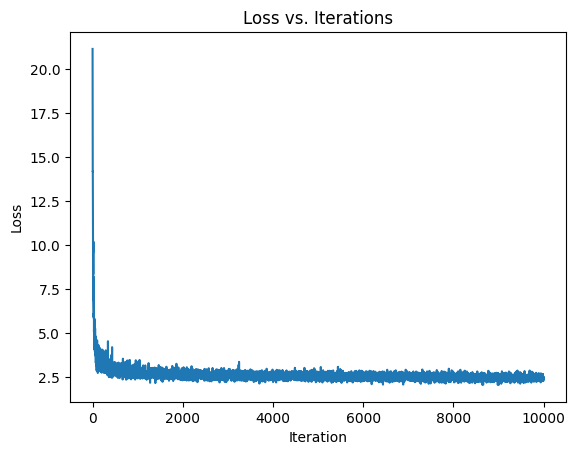

In [29]:
import time
import matplotlib.pyplot as plt

# Initialize lists to store loss values and iteration numbers
loss_values = []
iterations = []

# Start the timer
start_time = time.time()

# Training loop
for iter in range(10000):

    batch_indexes = torch.randint(0, X.shape[0], (100,), generator=generator, device='mps')

    
    emb = params[X[batch_indexes]]
    activation1 = torch.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ W1 + b1)
    logits = activation1 @ W2 + b2
    loss = F.cross_entropy(logits, Y[batch_indexes])
    
    # Store loss value and iteration number
    loss_values.append(loss.item())
    iterations.append(iter)
    
    if iter % 500 == 0:
        print(f'Iteration {iter}: {loss.item()}')
    
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad

# Print time elapsed
end_time = time.time()
print(f"Time elapsed: {end_time - start_time} seconds")

# Plot loss graph
plt.plot(iterations, loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()


In [30]:
emb = params[X]
activation1 = torch.tanh(emb.view(emb.shape[0], emb.shape[1] * emb.shape[2]) @ W1 + b1)
logits = activation1 @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()


2.4901480674743652